# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals of the Case Study

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Data Dictionary

- `Prospect ID`:	A unique ID with which the customer is identified.
- `Lead Number`:	A lead number assigned to each lead procured.
- `Lead Origin`:	The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
- `Lead Source`:	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
- `Do Not Email`:	An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
- `Do Not Call`:	An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
- `Converted`:	The target variable. Indicates whether a lead has been successfully converted or not.
- `TotalVisits`:	The total number of visits made by the customer on the website.
- `Total Time`: Spent on Website	The total time spent by the customer on the website.
- `Page Views Per Visit`:	Average number of pages on the website viewed during the visits.
- `Last Activity`:	Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
- `Country`:	The country of the customer.
- `Specialization`:	The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
- `How did you hear about X Education`:	The source from which the customer heard about X Education.
- `What is your current occupation`:	Indicates whether the customer is a student, umemployed or employed.
- `What matters most to you in choosing this course`:	An option selected by the customer indicating what is their main motto behind doing this course.
- `Indicating whether the customer had seen the ad in any of the listed items`:
    - Search	
    - Magazine	
    - Newspaper Article	
    - X Education Forums	
    - Newspaper	
    - Digital Advertisement	
    - Through Recommendations	Indicates whether the customer came in through recommendations.
- `Receive More Updates About Our Courses`:	Indicates whether the customer chose to receive more updates about the courses.
- `Tags`:	Tags assigned to customers indicating the current status of the lead.
- `Lead Quality`:	Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
- `Update me on Supply Chain Content`:	Indicates whether the customer wants updates on the Supply Chain Content.
- `Get updates on DM Content`:	Indicates whether the customer wants updates on the DM Content.
- `Lead Profile`:	A lead level assigned to each customer based on their profile.
- `City`:	The city of the customer.
- `An index and score assigned to each customer based on their activity and their profile`:
    - Asymmetrique Activity Index
    - Asymmetrique Profile Index	
    - Asymmetrique Activity Score	
    - Asymmetrique Profile Score	
- `I agree to pay the amount through cheque`:	Indicates whether the customer has agreed to pay the amount through cheque or not.
- `a free copy of Mastering The Interview`:	Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
- `Last Notable Activity`:	The last notable activity performed by the student.


# Reading and Understanding the Data

In [1]:
# Importing the required libraries for the case study

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [2]:
# Setting display options for pandas columns and rows 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [3]:
# Loading the dataset
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Printing shape
lead_data.shape

(9240, 37)

In [5]:
# Displaying the information of all the columns
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Displaying the information of all the numeric columns
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Cleaning the Dataset

In this section, we will analyze the missing values, remove the unnecessary columns, and performing all the required handling required before Exploratory Data Analysis.

In [7]:
# Display the head once again
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### **INSIGHTS:** 
From the data, we can observe many of the categorical variables have a level called 'Select' which needs to be handled.This is also the case of data missing completely at random, because it is as good as a null value. e.g. The level 'Select Specialization' means the customer had not selected this option while filling the form.

### Handling `Select` values in the data

Replacing the `Select` values as Null values in the data for below columns:
- Specialization
- How did you hear about X Education
- Lead Profile
- City

In [8]:
# Replace the Select category with NaN
columns_with_select_values = ['Specialization','How did you hear about X Education', 'Lead Profile', 'City']
lead_data[columns_with_select_values] = lead_data[columns_with_select_values].apply(lambda x: x.replace('Select', np.NaN))
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Checking the NULL Values

In [9]:
# Checking the percentage of null values in each column

lead_data.isnull().sum()/lead_data.shape[0]*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### **INSIGHTS**:
- There are some columns with <5% of missing values and there are many columns with > 35% of missing values.
- Hence, we will drop the rows for the columns which have <5% of missing values. We will drop the columns which have >35% of missing values.
- We will impute the null values for the remaining columns of possible. 

In [10]:
columns_to_drop = ['Specialization','How did you hear about X Education',
                  'Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index',
                   'Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score']
lead_data.drop(columns_to_drop, axis=1, inplace=True)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [11]:
# Checking the percentage of null values in each column once again

lead_data.isnull().sum()/lead_data.shape[0]*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### Now we will handle the null values in each of the column

We will handle the missing values of the categorical columns first.
- `Country`
- `What is your current occupation`
- `What matters most to you in choosing a course`

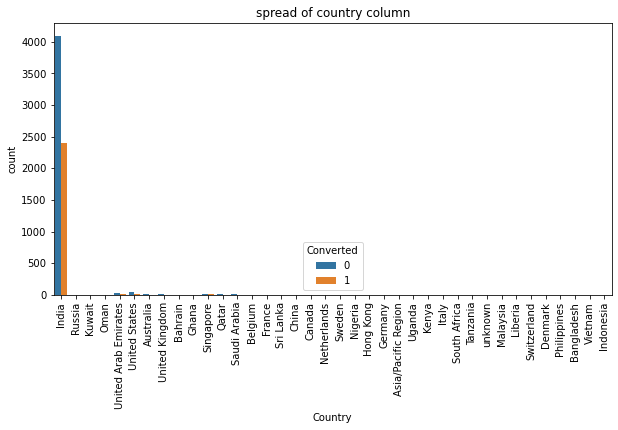

In [12]:
# Plotting spread of country column 

plt.figure(figsize=(10,5))
ax=sns.countplot(lead_data.Country, hue=lead_data.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('spread of country column')
plt.show()

From the above plot we can observe that India is the most common occurrence, let's analyze the counts of other countries also.

In [13]:
# Let's calculate the percentage of values in each country

lead_data.Country.value_counts()/lead_data.Country.value_counts().sum()*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Kuwait                   0.059006
Canada                   0.059006
Germany                  0.059006
South Africa             0.059006
Nigeria                  0.059006
Sweden                   0.044254
Italy                    0.029503
Netherlands              0.029503
Philippines              0.029503
Ghana                    0.029503
Belgium                  0.029503
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Russia                   0.014751
Switzerland   

- As we can see that the Number of Values for India are quite high compare to other countries, imputing the missing values won't help because of the `Skewness` in the data.
- So we will drop Country column also from analysis.

In [14]:
lead_data.drop('Country', axis=1, inplace=True)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


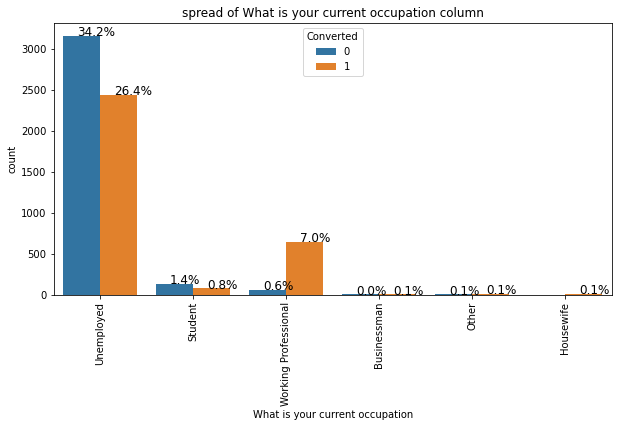

In [15]:
# Plotting spread of `What is your current occupation` column 

plt.figure(figsize=(10,5))
ax=sns.countplot(lead_data["What is your current occupation"], hue=lead_data.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('spread of What is your current occupation column')

# Percentage of bars

total = float(lead_data.shape[0])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
plt.show()

- From the above plot we can observe that working professionals are the one who are most likely to be converted to hot leads i.e., they have high chances of joining the course.
- As there is Other category present in the Occupation, we can place the Missing values into Other category.

In [16]:
# Imputing Nan values with 'Other' for 'What is your current occupation'.

lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Other')

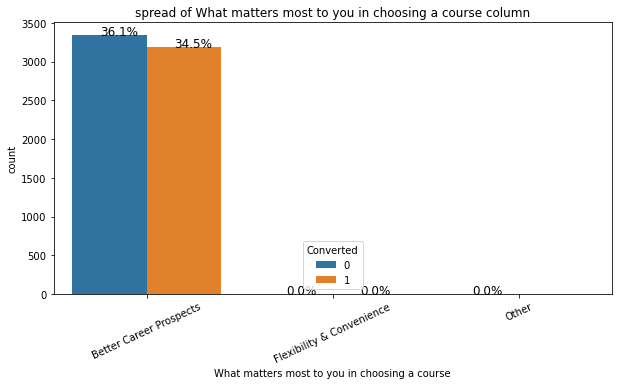

In [17]:
# Plotting spread of `What matters most to you in choosing a course` column 

plt.figure(figsize=(10,5))
ax=sns.countplot(lead_data["What matters most to you in choosing a course"], hue=lead_data.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
ax.set_title('spread of What matters most to you in choosing a course column')

# Percentage of bars

total = float(lead_data.shape[0])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
plt.show()

- Here also, we can see that count of Better Career Prospects value is quite high as compared to the other categories.
- The values in the categories are highly skewed and we can drop this column.

In [18]:
# Dropping the column 'What matters most to you in choosing a course' from analysis
lead_data.drop('What matters most to you in choosing a course', axis=1, inplace=True)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [19]:
# Let's check the missing value percentages of the dataset 

lead_data.isnull().sum()/lead_data.shape[0]*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

In [20]:
# Let's view the missing values in the TotalVisits Column
lead_data[lead_data.TotalVisits.isnull()].head(7)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,NaN,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,NaN,705,NaN,NaN,Working Professional,No,No,No,No,No,No,No,No,No,No,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,NaN,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,NaN,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,NaN,Working Professional,No,No,No,No,No,No,No,No,No,No,No,No,Modified
133,63ebde80-a465-4cdc-ab5a-5e880a7138b0,659158,Lead Add Form,Reference,No,No,1,NaN,986,NaN,NaN,Working Professional,No,No,No,No,No,No,No,No,No,No,No,No,Modified
134,0298b9a5-fedb-408b-a284-2d357583600f,659153,Lead Add Form,Welingak Website,No,No,1,NaN,889,NaN,NaN,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


The values missing 'TotalVisits' have missing values in other columns also.
So we will drop the missing values directly.

In [21]:
#  Ignore the null values and recalculate the percentage of mising values
lead_data = lead_data[~lead_data.TotalVisits.isnull()]
lead_data.isnull().sum()/lead_data.shape[0]*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.318576
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.000000
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.000000
Last Activity                               0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

In [22]:
# Let's drop the missing values from Lead Source also, as it has very less missing values percentage.
# Lead Source can be an important factor while building the model. That's why, it's good if we directly drop the values.
lead_data = lead_data[~lead_data['Lead Source'].isnull()]
lead_data.isnull().sum()/lead_data.shape[0]*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

All the null values are handled. Now let's drop the columns which are irrelevant with respect to business objective.

### Dropping the irrelevant columns from the perspective of business objective

We want to analyze whether a lead will turn into Hot Lead or not. So, we might not require following columns:
- Prospect ID: Because we already have Lead Number for each column.
- I agree to pay the amount through cheque: This is not relevant for the analysis, as this is payment option after conversion of hot leads.

In [23]:
columns_to_drop = ['Prospect ID','I agree to pay the amount through cheque']
lead_data.drop(columns_to_drop, axis=1, inplace=True)
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Modified


In [24]:
# Let's print the shape of the data once again
lead_data.shape

(9074, 23)

#### Let's analyze the columns which having flags

In [25]:
# Function to plot a subplot of the provided column from the data 
def plt_bar_graph(data, y_axis, title, axis):
    data[y_axis].value_counts().plot.bar(ax=axis)
    axis.set_title(title)
    axis.tick_params(axis='x',labelrotation=15)

In [26]:
# Function to plot graphs of categorical columnns

def plt_bar_graphs_of_categorical_columns(data, title, x, y, figx, figy):
    fig, ax = plt.subplots(x, y, figsize=(figx,figy))
    fig.tight_layout(h_pad=3)
    columns = [column for column in data.columns]
    num=0
    for i in range(x):
        for j in range(y):
            plt_bar_graph(data, columns[num], columns[num].capitalize(), ax[i,j])
            num+=1

    fig.suptitle(title,fontsize=15)
    plt.subplots_adjust(top=0.87)
    plt.show()

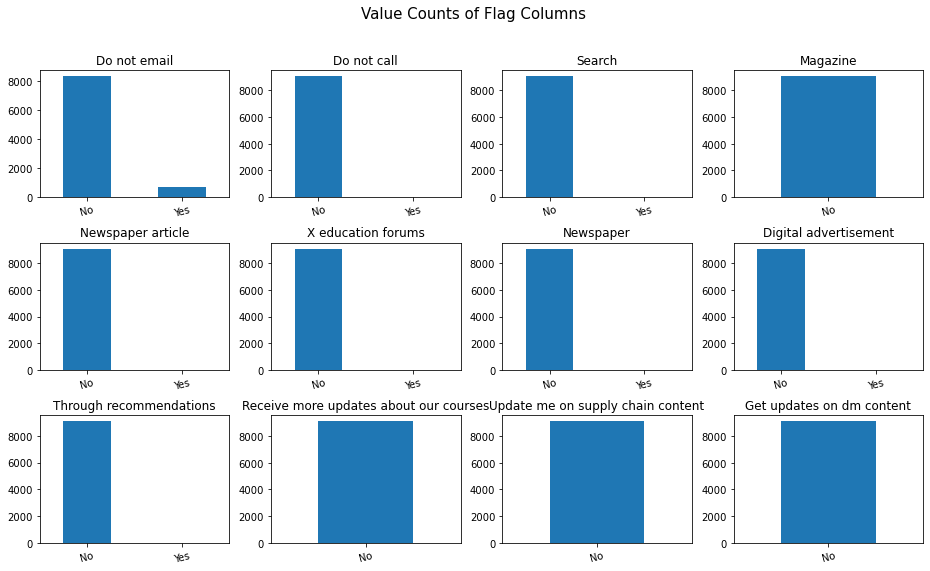

In [27]:
lead_data_flag_columns = ['Do Not Email','Do Not Call','Search',
                          'Magazine','Newspaper Article','X Education Forums', 
                          'Newspaper', 'Digital Advertisement','Through Recommendations', 
                          'Receive More Updates About Our Courses',
                          'Update me on Supply Chain Content', 'Get updates on DM Content']
plt_bar_graphs_of_categorical_columns(
    lead_data[lead_data_flag_columns],'Value Counts of Flag Columns', 3,4, 13,8)

#### **INSIGHTS**:
- All the above columns are highly `skewed` and having 'No' as major value. That is for 99% of the data, it has constant value.
- So, including such columns in our data won't help in deriving insights and making some conclusions.
- We will drop these columns from analysis.

In [28]:
# Let's drop the above flag columns as there are values for only single category.
lead_data.drop(lead_data_flag_columns, axis=1, inplace=True)
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


# Exploratory Data Analysis

## Univariate Analysis

- We will handle outliers for the numerical columns first.
- Then we will analyze the effect of other columns over 'Converted' column.

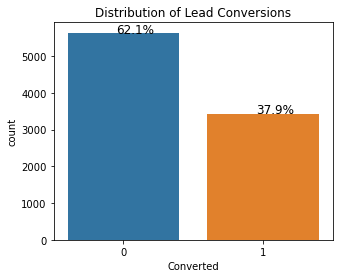

In [29]:
# Let's plot the bar plot for Converted columns
plt.figure(figsize=(5,4))
ax= sns.countplot(lead_data.Converted)
plt.title('Distribution of Lead Conversions')

# Percentage of bars

total = float(lead_data.shape[0])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
plt.show()

##### ***INSIGHTS*** :
- The count of those who have converted to hot leads is less than those who are not converted.
- 38% of the leads are converted to hot leads.

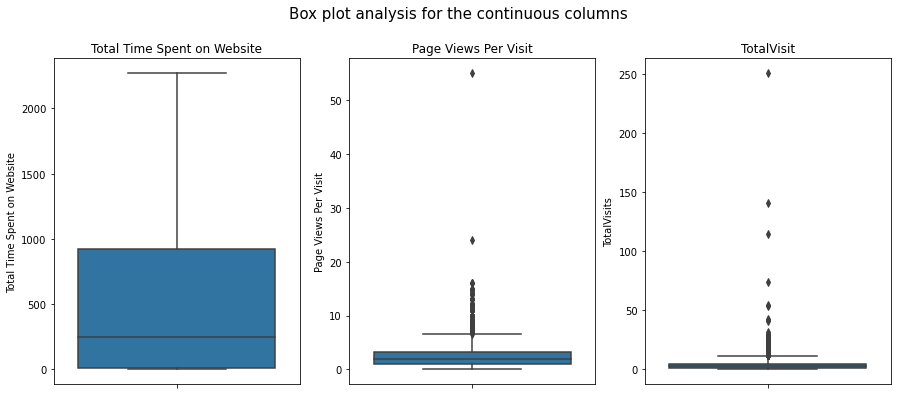

In [30]:
# Let's plot the box plot for the continuous columns
fig, ax = plt.subplots(1,3,figsize=(15, 6))

fig.set_constrained_layout(True)
fig.suptitle('Box plot analysis for the continuous columns',fontsize=15,y=1)

sns.boxplot(x='Total Time Spent on Website'
            ,data=lead_data, ax=ax[0], orient='v')
ax[0].set_title('Total Time Spent on Website')

sns.boxplot(x='Page Views Per Visit',
            data=lead_data, ax=ax[1], orient='v')
ax[1].set_title('Page Views Per Visit')

sns.boxplot(x='TotalVisits',
            data=lead_data, ax=ax[2], orient='v')
ax[2].set_title('TotalVisit')

plt.show()

**INSIGHTS** :
- There are no outliers in **Time Spent on Website**, but there are some outliers present in **Page Views Per Visit** and **TotalVisits**.
- Hence we will do soft capping on both sides of  **Page Views Per Visit** and **TotalVisits**.

In [31]:
# Creating list of numerical variables

num_lead_data = lead_data[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]

In [32]:
# Checking the statistical informations of the numerical variables

num_lead_data.describe(percentiles = [0.05,.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit,TotalVisits
count,9074.000000,9074.000000,9074.000000
mean,482.887481,2.370151,3.456028
std,545.256560,2.160871,4.858802
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,11.000000,1.000000,1.000000
50%,246.000000,2.000000,3.000000
75%,922.750000,3.200000,5.000000
90%,1373.000000,5.000000,7.000000
95%,1557.000000,6.000000,10.000000


In [33]:
# Let's cap the data at 95% percentile for the columns 'TotalVisits' and 'Page Views Per Visit'
total_visits = lead_data['TotalVisits'].quantile(0.95)
page_views = lead_data['Page Views Per Visit'].quantile(0.95)

# capping the TotalVisits and Page Views Per Visit values
lead_data['TotalVisits'][lead_data['TotalVisits']>total_visits] = total_visits
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit']>page_views] = page_views

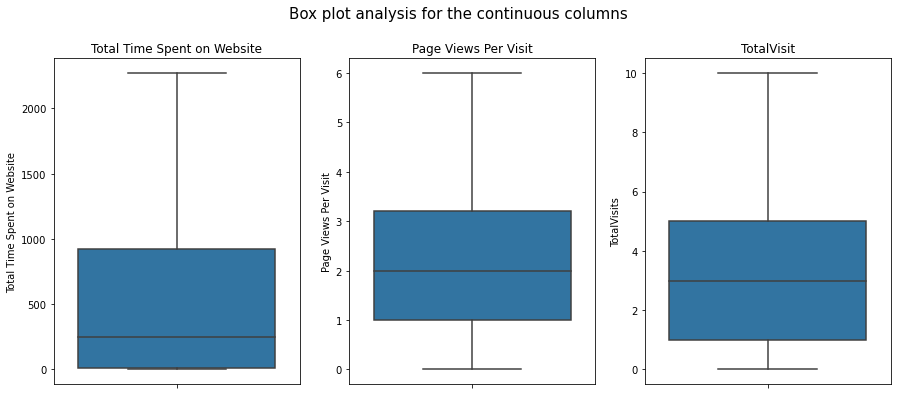

In [34]:
# Let's plot the box plot again for the continuous columns
fig, ax = plt.subplots(1,3,figsize=(15, 6))

fig.set_constrained_layout(True)
fig.suptitle('Box plot analysis for the continuous columns',fontsize=15,y=1)

sns.boxplot(x='Total Time Spent on Website'
            ,data=lead_data, ax=ax[0], orient='v')
ax[0].set_title('Total Time Spent on Website')

sns.boxplot(x='Page Views Per Visit',
            data=lead_data, ax=ax[1], orient='v')
ax[1].set_title('Page Views Per Visit')

sns.boxplot(x='TotalVisits',
            data=lead_data, ax=ax[2], orient='v')
ax[2].set_title('TotalVisit')

plt.show()

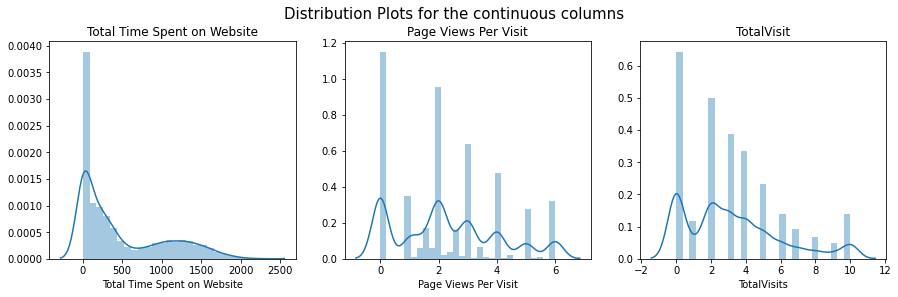

In [35]:
# Let's plot the distribution plot for the continuous columns
fig, ax = plt.subplots(1,3,figsize=(15, 4))

fig.set_constrained_layout(True)
fig.suptitle('Distribution Plots for the continuous columns',fontsize=15,y=1)

sns.distplot(lead_data['Total Time Spent on Website'], ax=ax[0])
ax[0].set_title('Total Time Spent on Website')

sns.distplot(lead_data['Page Views Per Visit'], ax=ax[1])
ax[1].set_title('Page Views Per Visit')

sns.distplot(lead_data['TotalVisits'], ax=ax[2])
ax[2].set_title('TotalVisit')

plt.show()

**INSIGHTS**:
- The distribution from box plots looks good after soft capping the outliers.
- Distribution plot gives overall idea about the distribution of Total time spent, Page Views per Visit and Total Visit.
- Although, the distribution is not normal and we have to scale the data afterwards, we can see the higher values tends to appear less for all the 3 columns and there are local maxima and minima values till some range.

In [36]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


## Bivariate Analysis

- We will analyze the effect of other columns over number of conversion of leads into hot leads i.e. Converted Column

In [37]:
# Let's print the head of the data
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


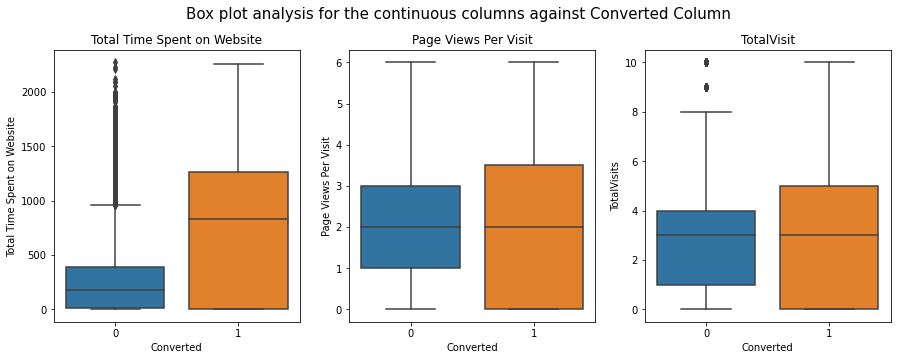

In [38]:
# Let's plot the box plot for the continuous columns against Converted Column
fig, ax = plt.subplots(1,3,figsize=(15, 5))

fig.set_constrained_layout(True)
fig.suptitle('Box plot analysis for the continuous columns against Converted Column',fontsize=15,y=1)

sns.boxplot(y='Total Time Spent on Website', x='Converted',
            data=lead_data, ax=ax[0], orient='v')
ax[0].set_title('Total Time Spent on Website')

sns.boxplot(y='Page Views Per Visit', x='Converted',
            data=lead_data, ax=ax[1], orient='v')
ax[1].set_title('Page Views Per Visit')

sns.boxplot(y='TotalVisits', x='Converted',
            data=lead_data, ax=ax[2], orient='v')
ax[2].set_title('TotalVisit')

plt.show()

#### **INSIGHTS**
- For the students who have converted to hot leads have higher median value overall in 'Total Time pent on website' than those who are not converted. That  means those who are spending more time on websites are likely to get converted to Hot leads. So website can be more attractive to increase the conversion rate.
- But for 'Page Views Per Visit'  and 'TotalVisits' there is not much significant difference between the leads who are converted and not converted. 

Let's plot the countplot of each column against Converted column.

In [39]:
# Function to plot the bar graph of counts for categorical columns against Converted
def bivariate_categorical(column, x, y):
    plt.figure(figsize=(x,y))
    ax=sns.countplot(lead_data[column], hue=lead_data.Converted)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=15)
    ax.set_title('Counts of categories in {}'.format(column))

    # Percentage of bars
    total = float(lead_data.shape[0])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

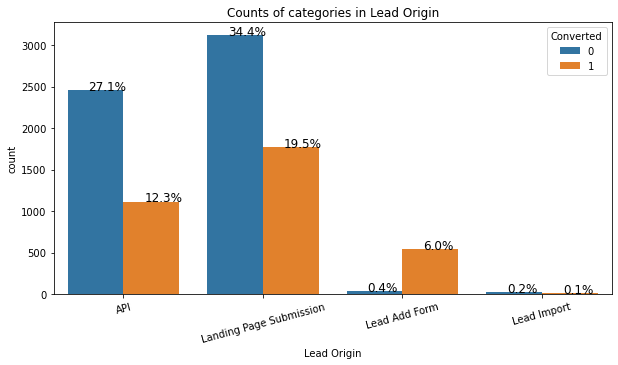

In [40]:
# Let's display counts of categories in Lead Origin
bivariate_categorical('Lead Origin', 10,  5)

***INSIGHTS***:
- No. of leads are quite high in API and Landing Page Submission.
- The Lead Add Form have higher rate of Lead Conversion as compared to other Lead Origins. So company should try to increase the number of leads for Lead Add Form.
- There is difference of almost 50% in the values of conversions if API and Landing Page Submission are Lead Origins. 

In [41]:
# Let's display the data once again
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


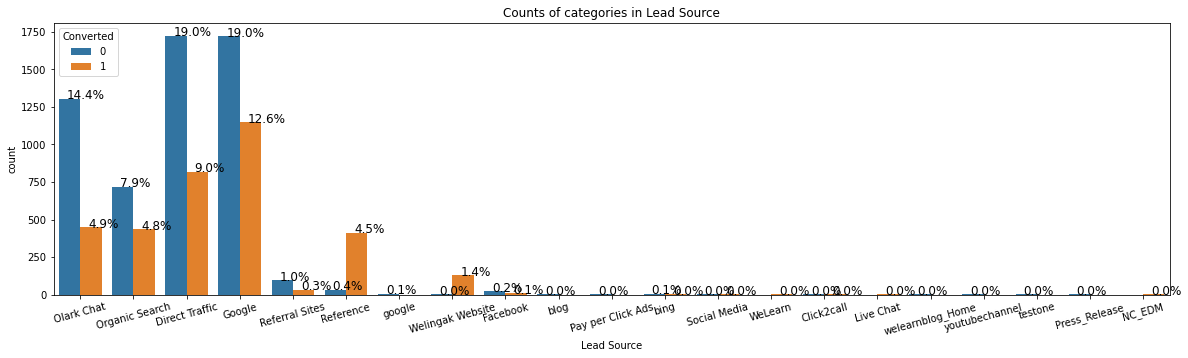

In [42]:
# Let's display counts of categories in Lead Source
bivariate_categorical('Lead Source', 20,5)

There are lot of insignificant categories. We will try to handle the categories first.

In [43]:
# Let's display value counts of Lead Source
lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
WeLearn                 1
youtubechannel          1
blog                    1
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

- We will merge those columns who have <10 appearances. 
- Also, we will combine the same categories with different name like google.

In [44]:
# Let's handle the values for Lead Source based on Above Condtions
lead_source = lead_data['Lead Source'].value_counts()[lead_data['Lead Source'].value_counts()<10].index
lead_source.drop('google')
lead_data['Lead Source'] = lead_data['Lead Source'].apply(lambda x: 'Others' if x in lead_source else x.capitalize())

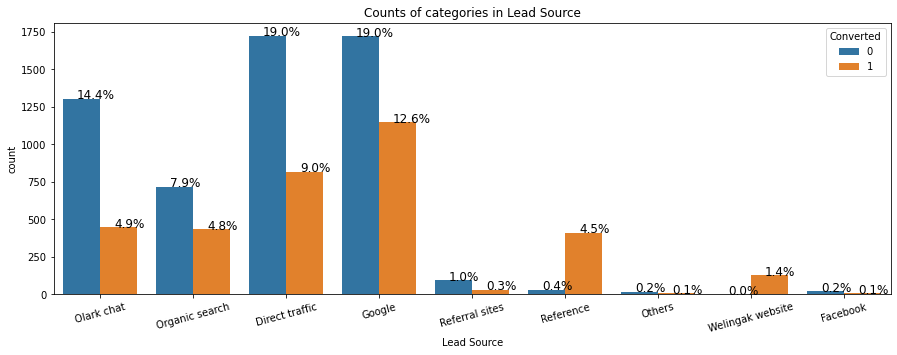

In [45]:
# Let's display counts of categories in Lead Source
bivariate_categorical('Lead Source', 15,5)

**INSIGHTS**:
- Those who are Referred and from Welingak Website, have higher percentage of lead conversions. From business aspect these two lead sources need to be look after and number of leads should be increased here to increase the conversion rate.
- For other columns, there are almost 50% of the leads that got converted to that of non-converted.

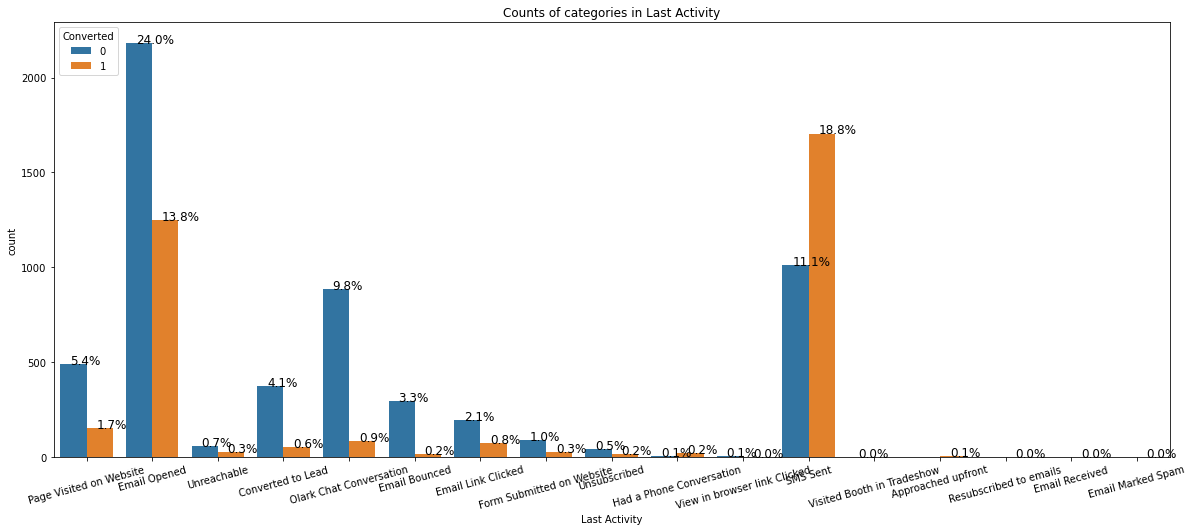

In [46]:
# Let's display counts of categories in Last Activity
bivariate_categorical('Last Activity', 20,8)

Similarly, there are multiple insignificant sub-categories present. We will club those into a single other cateogry.

In [47]:
# Checking the value counts for Last Activity
lead_data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

- We will merge those columns who have <10 appearances. 

In [48]:
# Let's handle the values for Last Activity based on Above Condtions
lead_source = lead_data['Last Activity'].value_counts()[lead_data['Last Activity'].value_counts()<10].index
lead_data['Last Activity'] = lead_data['Last Activity'].apply(lambda x: 'Others' if x in lead_source else x.capitalize())

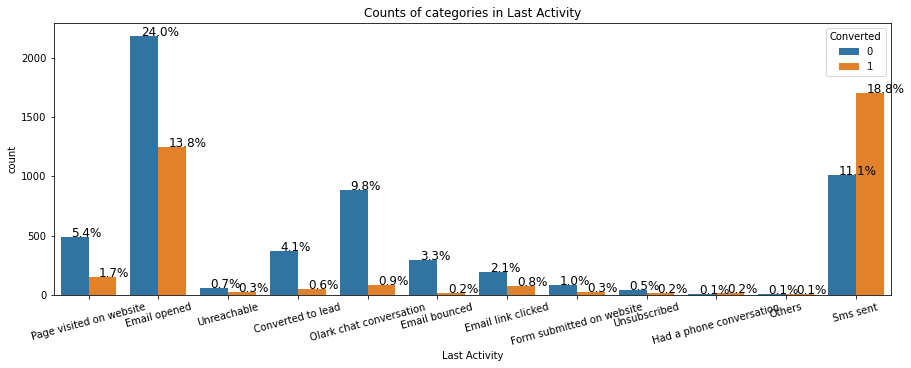

In [49]:
# Let's display counts of categories in Last Activity
bivariate_categorical('Last Activity', 15,5)

**INSIGHTS**:
- Those who have Last Activity as Sms sent, Had a phone conversation have higher conversion of hot leads.
- Those who have opened Email or started Olark Chat Conversion has lesser conversion of hot leads.

In [50]:
# Let's display the data once again
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark chat,0,0.0,0,0.0,Page visited on website,Unemployed,No,Modified
1,660728,API,Organic search,0,5.0,674,2.5,Email opened,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email opened,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to lead,Unemployed,No,Modified


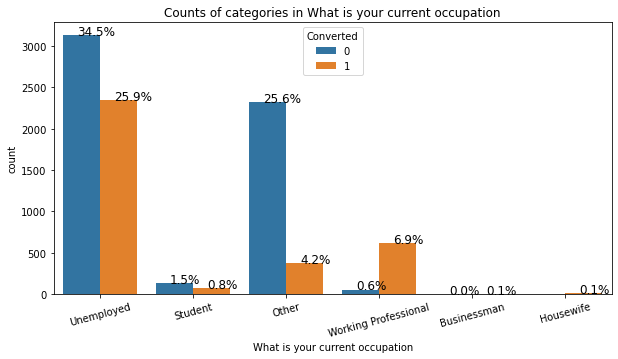

In [51]:
# Let's display counts of categories in What is your current occupation
bivariate_categorical('What is your current occupation', 10,5)

**INSIGHTS**:
- Those who are unemployed have almost balanced conversion of leads into hot leads.
- Those who are working professionals, have higher percentage of Conversion into Hot Leads.

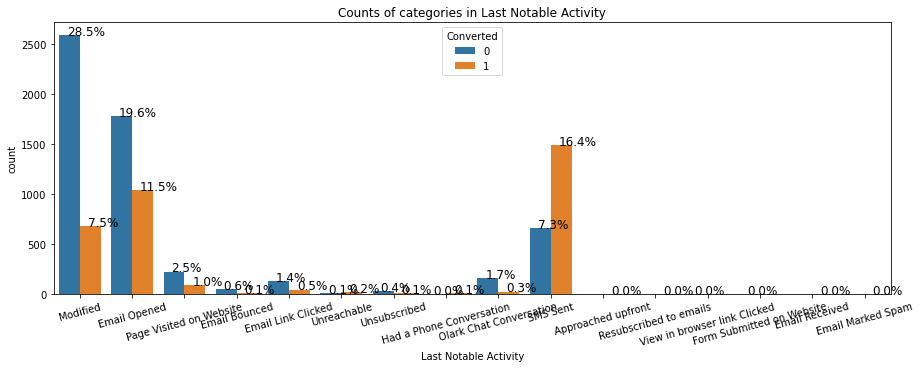

In [52]:
# Let's display counts of categories in Last Notable Activity
bivariate_categorical('Last Notable Activity', 15,5)

In [53]:
# We will analyze the column just like other columns
# Let's display counts in subcategories
lead_data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Form Submitted on Website          1
View in browser link Clicked       1
Resubscribed to emails             1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [54]:
# Let's handle the values for Last Activity based on Above Condtions
lead_source = lead_data['Last Notable Activity'].value_counts()[lead_data['Last Notable Activity'].value_counts()<10].index
lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].apply(lambda x: 'Others' if x in lead_source else x.capitalize())

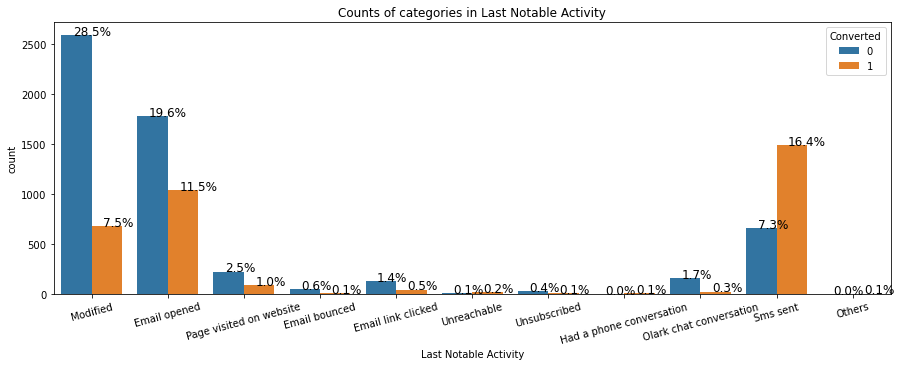

In [55]:
# Let's display counts of categories in Last Notable Activity
bivariate_categorical('Last Notable Activity', 15,5)

**INSIGHTS**:
- Those who have Last Notable Activity as Sms sent, have higher conversion of hot leads.
- Those who have opened Email or started Olark Chat Conversion has lesser conversion of hot leads.

# Data Preparation

- As most of the columns are categorical, we need to convert those to dummy variables before building the logistic regression model.
- Also, the numeric columns first needs to be scaled as they have different amount of measures.

In [56]:
# Let's display the head of the data
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark chat,0,0.0,0,0.0,Page visited on website,Unemployed,No,Modified
1,660728,API,Organic search,0,5.0,674,2.5,Email opened,Unemployed,No,Email opened
2,660727,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email opened,Student,Yes,Email opened
3,660719,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to lead,Unemployed,No,Modified


In [57]:
# Converting Lead_Column as index to identify each row uniquely
lead_data = lead_data.set_index('Lead Number')
lead_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark chat,0,0.0,0,0.0,Page visited on website,Unemployed,No,Modified
660728,API,Organic search,0,5.0,674,2.5,Email opened,Unemployed,No,Email opened
660727,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email opened,Student,Yes,Email opened
660719,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to lead,Unemployed,No,Modified


##### Converting the categorical column having flags to numerical columns with 1 or 0

In [58]:
# Let's convert the object flag column into numeric column
lead_data['A free copy of Mastering The Interview'] = lead_data['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})
lead_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark chat,0,0.0,0,0.0,Page visited on website,Unemployed,0,Modified
660728,API,Organic search,0,5.0,674,2.5,Email opened,Unemployed,0,Email opened
660727,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email opened,Student,1,Email opened
660719,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to lead,Unemployed,0,Modified


##### Reorganizing the column names into shorter form

- The column names are too long. After creating dummies, it will be very difficult to identify the columns.
- So we will shorten the names of the columns a little.

In [59]:
# Reducing the size of the names of the columnns logically.
lead_data_columns = ['_'.join(x.split()) for x in lead_data.columns]
lead_data_columns = [item.replace('Total_Time_Spent_on_Website','Time_Spent').replace('Page_Views_Per_Visit','Page_Views').
 replace('What_is_your_current_occupation','Occupation').replace('A_free_copy_of_Mastering_The_Interview','Has_Copy') for item in lead_data_columns]

# Replacing the column names with the created list of column names
lead_data.columns = lead_data_columns
lead_data.head()

,Lead_Origin,Lead_Source,Converted,TotalVisits,Time_Spent,Page_Views,Last_Activity,Occupation,Has_Copy,Last_Notable_Activity
Lead Number,,,,,,,,,,
660737,API,Olark chat,0,0.0,0,0.0,Page visited on website,Unemployed,0,Modified
660728,API,Organic search,0,5.0,674,2.5,Email opened,Unemployed,0,Email opened
660727,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email opened,Student,1,Email opened
660719,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to lead,Unemployed,0,Modified


##### Creating dummies for categorical columns

In [60]:
# Creating dummy variables for categorical variables with multiple labels

dummies = pd.get_dummies(lead_data[['Lead_Origin','Lead_Source','Last_Activity','Occupation','Last_Notable_Activity']], drop_first=True)
lead_data = pd.concat([lead_data, dummies], axis=1)
lead_data.head()

,Lead_Origin,Lead_Source,Converted,TotalVisits,Time_Spent,Page_Views,Last_Activity,Occupation,Has_Copy,Last_Notable_Activity,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark chat,Lead_Source_Organic search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral sites,Lead_Source_Welingak website,Last_Activity_Email bounced,Last_Activity_Email link clicked,Last_Activity_Email opened,Last_Activity_Form submitted on website,Last_Activity_Had a phone conversation,Last_Activity_Olark chat conversation,Last_Activity_Others,Last_Activity_Page visited on website,Last_Activity_Sms sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Email link clicked,Last_Notable_Activity_Email opened,Last_Notable_Activity_Had a phone conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark chat conversation,Last_Notable_Activity_Others,Last_Notable_Activity_Page visited on website,Last_Notable_Activity_Sms sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark chat,0,0.0,0,0.0,Page visited on website,Unemployed,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
660728,API,Organic search,0,5.0,674,2.5,Email opened,Unemployed,0,Email opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
660727,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email opened,Student,1,Email opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
660719,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to lead,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [61]:
# Dropping the previous columns as the dummies are already created

lead_data.drop(['Lead_Origin','Lead_Source','Last_Activity','Occupation','Last_Notable_Activity'], axis=1, inplace=True)
lead_data.head()

,Converted,TotalVisits,Time_Spent,Page_Views,Has_Copy,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark chat,Lead_Source_Organic search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral sites,Lead_Source_Welingak website,Last_Activity_Email bounced,Last_Activity_Email link clicked,Last_Activity_Email opened,Last_Activity_Form submitted on website,Last_Activity_Had a phone conversation,Last_Activity_Olark chat conversation,Last_Activity_Others,Last_Activity_Page visited on website,Last_Activity_Sms sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Email link clicked,Last_Notable_Activity_Email opened,Last_Notable_Activity_Had a phone conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark chat conversation,Last_Notable_Activity_Others,Last_Notable_Activity_Page visited on website,Last_Notable_Activity_Sms sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
660681,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


##### Displaying the final shape of the data before model building

In [62]:
# Displaying the shape of the data
lead_data.shape

(9074, 42)

- The data now have 9074 rows after cleaning and performing exploratory data analysis. 
- There are 42 columns in the data after creating dummies overall.

Before modeling, we have to split the data into train data set and test data set. Also, the numerical columns needs to be scaled.

### Splitting the data into train data and test data

In [63]:
# Let's split the data into train dataset and test dataset.
train_lead_data, test_lead_data = train_test_split(lead_data, train_size=0.7, random_state=100)

In [64]:
# Checking the shape of the train data
train_lead_data.shape

(6351, 42)

In [65]:
# Checking the shape of the test data
test_lead_data.shape

(2723, 42)

### Scaling the numerical columns

Let's scale the numerical columns using StandardScaler

In [66]:
# Scaling the numerical columns
scaler = StandardScaler()
scaled_train_lead_data = train_lead_data.copy(deep=True)
scaled_train_lead_data[['TotalVisits','Time_Spent','Page_Views']] = scaler.fit_transform(scaled_train_lead_data[['TotalVisits','Time_Spent','Page_Views']])
scaled_train_lead_data.head()

,Converted,TotalVisits,Time_Spent,Page_Views,Has_Copy,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark chat,Lead_Source_Organic search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral sites,Lead_Source_Welingak website,Last_Activity_Email bounced,Last_Activity_Email link clicked,Last_Activity_Email opened,Last_Activity_Form submitted on website,Last_Activity_Had a phone conversation,Last_Activity_Olark chat conversation,Last_Activity_Others,Last_Activity_Page visited on website,Last_Activity_Sms sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Email link clicked,Last_Notable_Activity_Email opened,Last_Notable_Activity_Had a phone conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark chat conversation,Last_Notable_Activity_Others,Last_Notable_Activity_Page visited on website,Last_Notable_Activity_Sms sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
630949,0,-0.432779,-0.160255,-0.155018,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
649355,0,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
579735,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
614238,1,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
588625,1,0.643547,2.017593,0.122613,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [67]:
# Now let's use the same fitted scaler object to transform the numerical columns of test data also
scaled_test_lead_data = test_lead_data.copy(deep=True)
scaled_test_lead_data[['TotalVisits','Time_Spent','Page_Views']] = scaler.transform(scaled_test_lead_data[['TotalVisits','Time_Spent','Page_Views']])
scaled_test_lead_data.head()

,Converted,TotalVisits,Time_Spent,Page_Views,Has_Copy,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark chat,Lead_Source_Organic search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral sites,Lead_Source_Welingak website,Last_Activity_Email bounced,Last_Activity_Email link clicked,Last_Activity_Email opened,Last_Activity_Form submitted on website,Last_Activity_Had a phone conversation,Last_Activity_Olark chat conversation,Last_Activity_Others,Last_Activity_Page visited on website,Last_Activity_Sms sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Email link clicked,Last_Notable_Activity_Email opened,Last_Notable_Activity_Had a phone conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark chat conversation,Last_Notable_Activity_Others,Last_Notable_Activity_Page visited on website,Last_Notable_Activity_Sms sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
628652,0,0.284772,-0.600595,0.955505,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
644500,1,0.643547,1.887326,1.510766,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
588935,0,-0.432779,-0.752879,-0.155018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
619437,1,-1.150329,-0.888650,-1.265540,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
623381,0,1.719873,-0.587751,2.066027,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


#### Multicollinearity Review using Heatmap

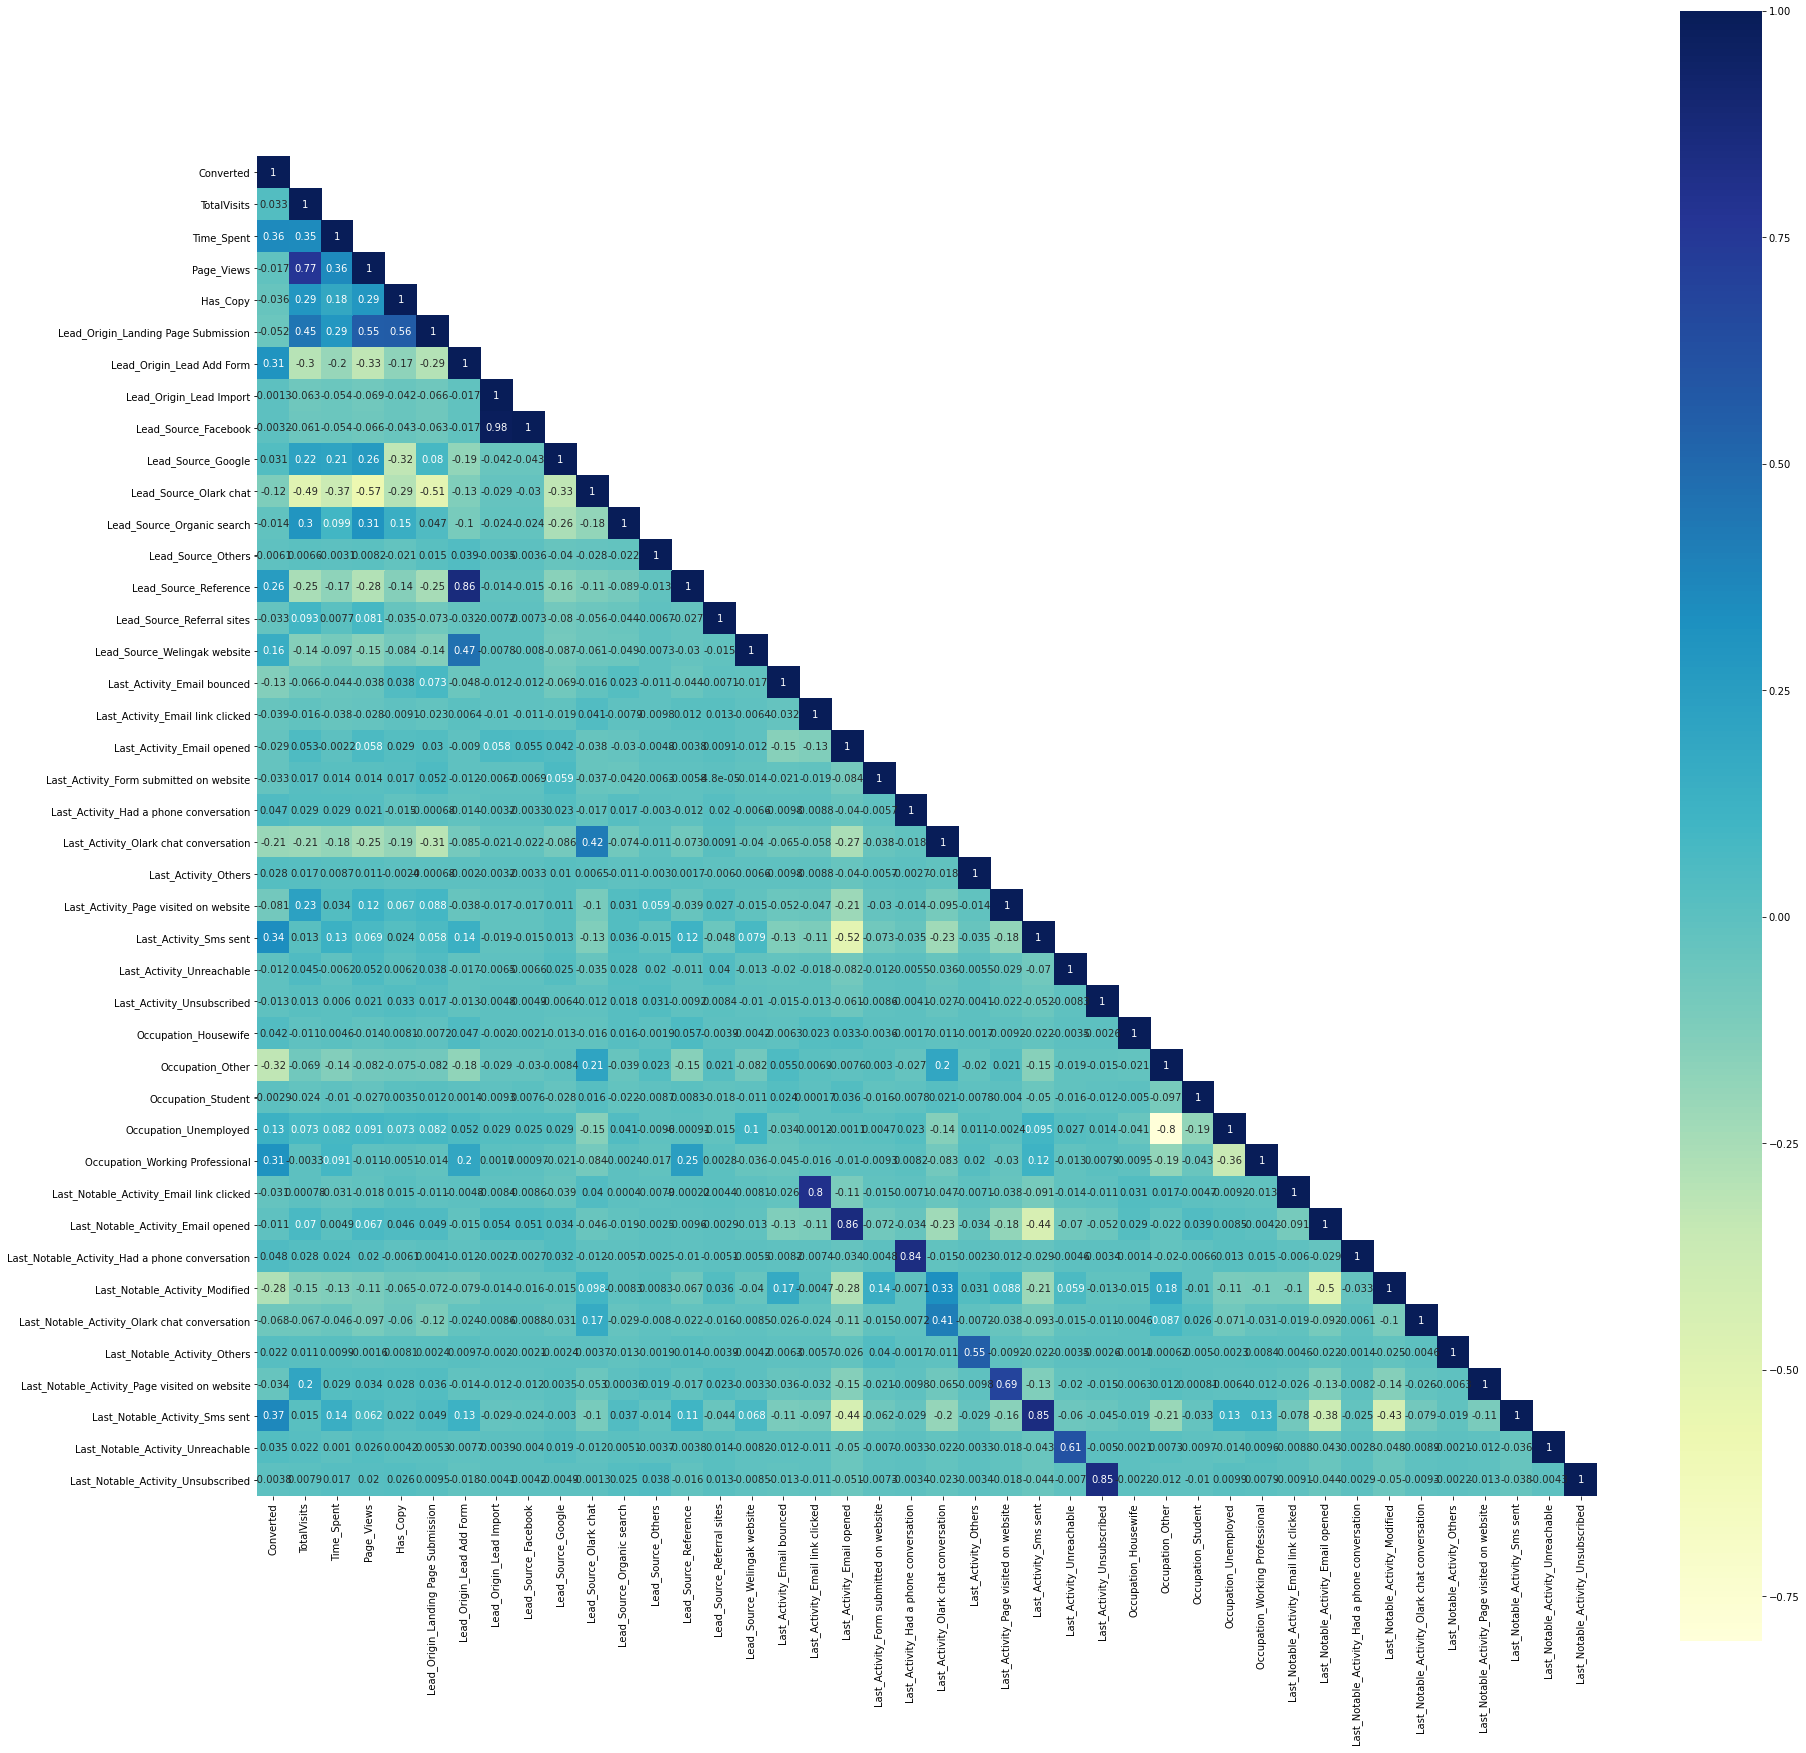

In [68]:
## Analyzing the correlation values using heatmaps

plt.figure(figsize=(30,30))

# heatmap
mask= np.array(scaled_train_lead_data.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(scaled_train_lead_data.corr(), mask=mask, square=True, cmap="YlGnBu", annot=True)
plt.show()

**INSIGHTS**:
- Following are the pairs having a little high correlation:
    - Lead_Source_Reference and Lead_Origin_Lead_Add_Form
    - Last_Activity_Email_Link_Clicked and Last_Notable_Activity_Email_Link_Clicked
    - Last_Activity_Email opened and Last_Notable_Activity_Email opened
    - Last_Activity_Had a phone conversation and Last_Notable_Activity_Had a phone conversation
    - Last_Activity_Sms sent and Last_Notable_Activity_Email_Sms sent
    - Last_Activity_Unsubscribed and Last_Notable_Activity_Unsubscribed
    - Occupation_Unemployed and Occupation_Other
- This can be handled during Recursive Function Elimination and while building the model.

#### Let's define dependent and independent variables

In [69]:
# Dropping one of the columns from above list of columns
drop_correlated = ['Last_Notable_Activity_Email link clicked',
                  'Last_Notable_Activity_Email opened', 'Last_Notable_Activity_Had a phone conversation',
                  'Last_Notable_Activity_Sms sent', 'Last_Notable_Activity_Unsubscribed', 'Occupation_Other']
scaled_train_lead_data.drop(drop_correlated, axis=1, inplace=True)
scaled_train_lead_data.head()

,Converted,TotalVisits,Time_Spent,Page_Views,Has_Copy,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark chat,Lead_Source_Organic search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral sites,Lead_Source_Welingak website,Last_Activity_Email bounced,Last_Activity_Email link clicked,Last_Activity_Email opened,Last_Activity_Form submitted on website,Last_Activity_Had a phone conversation,Last_Activity_Olark chat conversation,Last_Activity_Others,Last_Activity_Page visited on website,Last_Activity_Sms sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark chat conversation,Last_Notable_Activity_Others,Last_Notable_Activity_Page visited on website,Last_Notable_Activity_Unreachable
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
630949,0,-0.432779,-0.160255,-0.155018,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
649355,0,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
579735,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
614238,1,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
588625,1,0.643547,2.017593,0.122613,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [70]:
# Checking the shape of the modified train data
scaled_train_lead_data.shape

(6351, 36)

#### Let's define dependent and independent variables

In [71]:
# Let's define X and y for train data
y_train_lead_data = scaled_train_lead_data.pop('Converted')
X_train_lead_data = scaled_train_lead_data

# Model Building

In [72]:
# Let's build the logistic regression model using the train data that we have
logisticRegressionModel = sm.GLM(y_train_lead_data,sm.add_constant(X_train_lead_data), family = sm.families.Binomial())
res = logisticRegressionModel.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.0
Date:                Mon, 08 Feb 2021   Deviance:                       5052.1
Time:                        22:15:09   Pearson chi2:                 6.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**INSIGHTS**:
- We have built our logistic regression model considering all the columns as significant.
- There are many columns which are significant after looking at p values.
- We can use the RFE feature for selection of the columns that are most important and significant.

### Feature Selection Using RFE

In [73]:
# Running RFE with the output number of the variable equal to 20

logisticRegression = LogisticRegression()
logisticRegression.fit(X_train_lead_data, y_train_lead_data)

rfe = RFE(logisticRegression, 20) # running RFE
rfe = rfe.fit(X_train_lead_data, y_train_lead_data)

 **P.S.** : There is a known issue with scipy library for **'version 1.6.0'**. If you are getting an error as **"str object has no attribute 'decode'"**, then please downgrade the library version to 1.5.4.

In [74]:
# Displaying the column information with their rank of fit based on RFE
rfe_details = pd.DataFrame({'Column':X_train_lead_data.columns,'RFE_Supported':rfe.support_,'RFE_Rank':rfe.ranking_})
rfe_details.sort_values('RFE_Rank')

,Column,RFE_Supported,RFE_Rank
17,Last_Activity_Email opened,True,1
31,Last_Notable_Activity_Olark chat conversation,True,1
30,Last_Notable_Activity_Modified,True,1
29,Occupation_Working Professional,True,1
28,Occupation_Unemployed,True,1
27,Occupation_Student,True,1
26,Occupation_Housewife,True,1
23,Last_Activity_Sms sent,True,1
21,Last_Activity_Others,True,1
20,Last_Activity_Olark chat conversation,True,1


In [75]:
# Extracting the required columns for model building
col_to_consider = list(X_train_lead_data.columns[rfe.support_])

## Building First Model of Logistic Regression

Let's build logistic regression model based on the columns selected in RFE.

In [76]:
### Again building the model using the selected columns
lrmodel1 = sm.GLM(y_train_lead_data,sm.add_constant(X_train_lead_data[col_to_consider]), family = sm.families.Binomial())
res = lrmodel1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.5
Date:                Mon, 08 Feb 2021   Deviance:                       5110.9
Time:                        22:15:11   Pearson chi2:                 6.19e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [77]:
# Let's define the function to calculate the VIFs (Variance Inflation Factor) to analyze the multicollinearity
def cal_vif_lead_data(col_to_consider):
    vif = pd.DataFrame()
    X = X_train_lead_data[col_to_consider]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [78]:
# Calculate VIFs of the columns
cal_vif_lead_data(col_to_consider)

,Features,VIF
1,Lead_Origin_Lead Add Form,62.47
5,Lead_Source_Reference,48.09
6,Lead_Source_Welingak website,15.47
15,Occupation_Unemployed,2.54
10,Last_Activity_Olark chat conversation,2.10
8,Last_Activity_Email opened,2.04
12,Last_Activity_Sms sent,2.00
4,Lead_Source_Olark chat,1.91
17,Last_Notable_Activity_Modified,1.77
3,Lead_Source_Google,1.67


**INFERENCES**:
- Recursive Feature Elimination helped a lot for analyzing 20 most significant factors. But after looking at p values, still there are some columns which are insignificant.
- After looking at VIFs, there are no columns present which will lead to multicollinearity problem.
- So, we can consider the model after dropping significant values one by one.

## Building Second Model of Logistic Regression

Let's build second logistic regression model after dropping the columns which are highly insignificant.

In [79]:
# Let's drop Occupation_Housewife from our analysis as it's highly insignificant.
col_to_consider.remove('Occupation_Housewife')

In [80]:
# Building the second model after dropping Occupation_Housewife
lrmodel2 = sm.GLM(y_train_lead_data,sm.add_constant(X_train_lead_data[col_to_consider]), family = sm.families.Binomial())
res = lrmodel2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.4
Date:                Mon, 08 Feb 2021   Deviance:                       5126.9
Time:                        22:15:12   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [81]:
# Checking the VIF's again
cal_vif_lead_data(col_to_consider)

,Features,VIF
1,Lead_Origin_Lead Add Form,62.47
5,Lead_Source_Reference,48.09
6,Lead_Source_Welingak website,15.47
14,Occupation_Unemployed,2.54
10,Last_Activity_Olark chat conversation,2.10
8,Last_Activity_Email opened,2.03
12,Last_Activity_Sms sent,2.00
4,Lead_Source_Olark chat,1.91
16,Last_Notable_Activity_Modified,1.77
3,Lead_Source_Google,1.67


**INFERENCES**:
- There are still many columns with High VIFs. Lead_Origin_Lead Add Form has very high VIF value. Hence we can drop it and then rebuild the model.

## Building Third Model of Logistic Regression

Let's build the third logistic regression model after dropping the columns which are highly insignificant.

In [82]:
# Let's drop Lead_Origin_Lead Add Form from our analysis as it's highly insignificant.
col_to_consider.remove('Lead_Origin_Lead Add Form')

In [83]:
# Building the second model after dropping Occupation_Housewife
lrmodel3 = sm.GLM(y_train_lead_data,sm.add_constant(X_train_lead_data[col_to_consider]), family = sm.families.Binomial())
res = lrmodel3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.3
Date:                Mon, 08 Feb 2021   Deviance:                       5132.6
Time:                        22:15:12   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [84]:
# Checking the VIF's again
cal_vif_lead_data(col_to_consider)

,Features,VIF
13,Occupation_Unemployed,2.54
9,Last_Activity_Olark chat conversation,2.10
7,Last_Activity_Email opened,2.03
11,Last_Activity_Sms sent,2.00
3,Lead_Source_Olark chat,1.91
15,Last_Notable_Activity_Modified,1.77
2,Lead_Source_Google,1.67
14,Occupation_Working Professional,1.34
16,Last_Notable_Activity_Olark chat conversation,1.32
0,Time_Spent,1.32


**INFERENCES**:
- Last_Notable_Activity_Olark chat conversation is still insignificant. We can reanalyze the model after dropping it.

## Building Fourth Model of Logistic Regression

Let's build the third logistic regression model after dropping the columns which are highly insignificant.

In [85]:
# Let's drop Last_Notable_Activity_Olark chat conversation a phone conversation from our analysis as it's highly insignificant.
col_to_consider.remove('Last_Notable_Activity_Olark chat conversation')

In [86]:
# Building the second model after dropping Occupation_Housewife
lrmodel4 = sm.GLM(y_train_lead_data,sm.add_constant(X_train_lead_data[col_to_consider]), family = sm.families.Binomial())
res = lrmodel4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.2
Date:                Mon, 08 Feb 2021   Deviance:                       5134.3
Time:                        22:15:13   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [87]:
# Checking the VIF's again
cal_vif_lead_data(col_to_consider)

,Features,VIF
13,Occupation_Unemployed,2.53
7,Last_Activity_Email opened,2.03
11,Last_Activity_Sms sent,2.00
3,Lead_Source_Olark chat,1.90
9,Last_Activity_Olark chat conversation,1.74
2,Lead_Source_Google,1.66
15,Last_Notable_Activity_Modified,1.64
14,Occupation_Working Professional,1.34
0,Time_Spent,1.32
4,Lead_Source_Reference,1.30


**INFERENCES**:
- All the values are significant and VIF values are also good.
- There are some unideal situations still present in the model after observing the beta coefficients. e.g. Last_Notable_Activity_Unreachable has positive beta coefficient. Actually this is a negative factor and should have a negative coefficient.
- Let's consider the model after dropping such factors.

## Building Fifth Model of Logistic Regression

Let's build the third logistic regression model after dropping the columns which are highly insignificant.

In [88]:
# Let's drop Last_Notable_Activity_Unreachable opened from our analysis as it's highly insignificant.
col_to_consider.remove('Last_Notable_Activity_Unreachable')

In [89]:
# Building the second model after dropping Occupation_Housewife
lrmodel5 = sm.GLM(y_train_lead_data,sm.add_constant(X_train_lead_data[col_to_consider]), family = sm.families.Binomial())
res = lrmodel5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.8
Date:                Mon, 08 Feb 2021   Deviance:                       5153.7
Time:                        22:15:13   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [90]:
# Checking the VIF's again
cal_vif_lead_data(col_to_consider)

,Features,VIF
13,Occupation_Unemployed,2.52
7,Last_Activity_Email opened,2.02
11,Last_Activity_Sms sent,1.99
3,Lead_Source_Olark chat,1.90
9,Last_Activity_Olark chat conversation,1.74
2,Lead_Source_Google,1.66
15,Last_Notable_Activity_Modified,1.64
14,Occupation_Working Professional,1.34
0,Time_Spent,1.32
4,Lead_Source_Reference,1.30


**INFERENCES**:
- All the values are significant and VIF values are also good.
- As Last_Activity_Others is computed for missing values, it may lead us to wrong interpretations.
- Let's consider the model after Last_Activity_Others

## Building Sixth Model of Logistic Regression

Let's build the third logistic regression model after dropping the columns which are highly insignificant.

In [91]:
# Let's drop Last_Activity_Others_Unreachable opened from our analysis as it's highly insignificant.
col_to_consider.remove('Last_Activity_Others')

In [92]:
# Building the second model after dropping Occupation_Housewife
lrmodel6 = sm.GLM(y_train_lead_data,sm.add_constant(X_train_lead_data[col_to_consider]), family = sm.families.Binomial())
res = lrmodel6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.2
Date:                Mon, 08 Feb 2021   Deviance:                       5160.3
Time:                        22:15:14   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [93]:
# Checking the VIF's again
cal_vif_lead_data(col_to_consider)

,Features,VIF
12,Occupation_Unemployed,2.51
7,Last_Activity_Email opened,2.01
10,Last_Activity_Sms sent,1.98
3,Lead_Source_Olark chat,1.89
9,Last_Activity_Olark chat conversation,1.73
2,Lead_Source_Google,1.65
14,Last_Notable_Activity_Modified,1.64
13,Occupation_Working Professional,1.33
0,Time_Spent,1.32
4,Lead_Source_Reference,1.30


**INFERENCES**:
- This looks to be a perfect model, as all the values are significant.
- We can now use this model to make predictions on both train and test data.
- We can analyze the performance of our model

## Making predictions using above Logistic Regression Model on Train Data

- We will make predictions using the above trained model to calculate the probability of the customer converting to hot leads.
- We will also calculate the lead score based on the probability predicted.
- We can analyze how good our model is predicting using various metrics such as Accuracy,  Specificity, Sensitivity, Precision, Recall. 

In [94]:
# Getting the predicted probability values on the train set
predicted_train_lead_prob = res.predict(sm.add_constant(X_train_lead_data[col_to_consider]))
predicted_train_lead_prob.head()

Lead Number
630949    0.083327
649355    0.245119
579735    0.463696
614238    0.669239
588625    0.826220
dtype: float64

In [95]:
# Reshaping the scores
predicted_train_lead_score = predicted_train_lead_prob.apply(lambda x: round(x*100))
predicted_train_lead_prob = predicted_train_lead_prob.values.reshape(-1)
predicted_train_lead_score = predicted_train_lead_score.values.reshape(-1)
predicted_train_lead_score

array([ 8, 25, 46, ..., 95, 34, 31], dtype=int64)

##### Creating a dataframe with the actual Converted, the predicted probabilities and lead_score

In [96]:
# Creating the dataframe with required values
y_train_pred_final = pd.DataFrame({'Converted':y_train_lead_data.values, 
                                   'Conversion_Probability': predicted_train_lead_prob,
                                  'Lead_Score': predicted_train_lead_score})
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_Score
0,0,0.083327,8
1,0,0.245119,25
2,0,0.463696,46
3,1,0.669239,67
4,1,0.826220,83


##### Creating new column 'Predicted' with 1 if Conversion_Probability > 0.5 else 0

In [97]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_Score,Predicted
0,0,0.083327,8,0
1,0,0.245119,25,0
2,0,0.463696,46,0
3,1,0.669239,67,1
4,1,0.826220,83,1


In [98]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion = pd.DataFrame(confusion)
confusion.index = ['Not Converted','Converted']
confusion.columns = ['Not Converted','Converted']
confusion

,Not Converted,Converted
Not Converted,3475,430
Converted,752,1694


In [99]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8138875767595655


***INSIGHTS***:
- We have calculated the probability for the conversion of leads into hot leads using the model that we have built previously.
- We also have calculated the lead score using the probability.
- We also got a good accuracy score which is ~81%.
- But as we used the threshold frequency as 0.5 randomly, there might be a chance that our model can predict well if we analyze the actual threshold frequency using ROC curve and other techniques like trade off between Specificity-Sensitivity or Precision-Recall to calculate the actual cut off.

## Sensitivity - Specificity Analysis 

### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [100]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [101]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False)

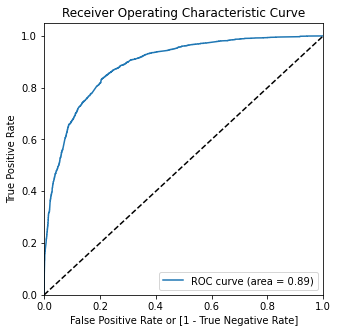

In [102]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

### Finding Optimal Cutoff Point

Optimal Cutoff Probability is that probability where we get balanced Sensitivity and Specificity

In [103]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
y_train_pred_cut_off = y_train_pred_final.copy(deep=True)
for i in numbers:
    y_train_pred_cut_off[i]= y_train_pred_cut_off.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_cut_off.head()

,Converted,Conversion_Probability,Lead_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.083327,8,0,1,0,0,0,0,0,0,0,0,0
1,0,0.245119,25,0,1,1,1,0,0,0,0,0,0,0
2,0,0.463696,46,0,1,1,1,1,1,0,0,0,0,0
3,1,0.669239,67,1,1,1,1,1,1,1,1,0,0,0
4,1,0.826220,83,1,1,1,1,1,1,1,1,1,1,0


In [104]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_cut_off.Converted, y_train_pred_cut_off[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.641631  0.971382  0.435083
0.2   0.2  0.753897  0.919460  0.650192
0.3   0.3  0.797197  0.868357  0.752625
0.4   0.4  0.811053  0.769011  0.837388
0.5   0.5  0.813888  0.692559  0.889885
0.6   0.6  0.806015  0.625102  0.919334
0.7   0.7  0.779877  0.517171  0.944430
0.8   0.8  0.760195  0.426819  0.969014
0.9   0.9  0.712329  0.274325  0.986684


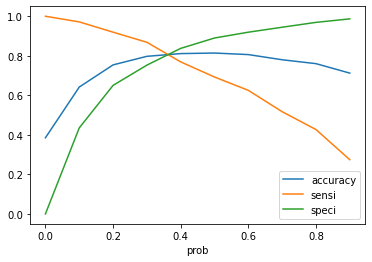

In [105]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, ~0.38 is the optimum point to take it as a cutoff probability.
- We can now change the cutoff frequency and then recalculate the predicted values to analyze the conversions.

##### Creating new column 'Predicted' with 1 if Conversion_Probability > 0.38 else 0

In [106]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.38 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_Score,Predicted
0,0,0.083327,8,0
1,0,0.245119,25,0
2,0,0.463696,46,1
3,1,0.669239,67,1
4,1,0.826220,83,1


In [107]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion = pd.DataFrame(confusion)
confusion.index = ['Not Converted','Converted']
confusion.columns = ['Not Converted','Converted']
confusion

,Not Converted,Converted
Not Converted,3165,740
Converted,472,1974


In [108]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8091639111950873


#### Metrics beyond simply accuracy

In [109]:
TP = confusion.iloc[1,1] # true positive 
TN = confusion.iloc[0,0] # true negatives
FP = confusion.iloc[0,1] # false positives
FN = confusion.iloc[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8070318887980377

In [111]:
# Let us calculate specificity
TN / float(TN+FP)

0.8104993597951344

In [112]:
# Calculate false postive rate - predicting as hot lead even when lead hasn't converted.
print(FP/ float(TN+FP))

0.18950064020486557


In [113]:
# positive predictive value 
print (TP / float(TP+FP))

0.7273397199705232


In [114]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8702227110255705


## Precision and Recall Analysis

In [115]:
# Looking at the confusion matrix again
confusion_train = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion_train = pd.DataFrame(confusion)
confusion_train.index = ['Not Converted','Converted']
confusion_train.columns = ['Not Converted','Converted']
confusion_train

,Not Converted,Converted
Not Converted,3165,740
Converted,472,1974


##### Precision
TP / TP + FP

In [116]:
confusion_train.iloc[1,1]/(confusion_train.iloc[0,1]+confusion_train.iloc[1,1])

0.7273397199705232

##### Recall
TP / TP + FN

In [117]:
confusion_train.iloc[1,1]/(confusion_train.iloc[1,0]+confusion_train.iloc[1,1])

0.8070318887980377

Using sklearn utilities for the same

In [118]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7273397199705232

In [119]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8070318887980377

### Precision and recall tradeoff

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

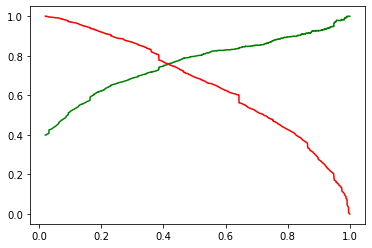

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### **INSIGHTS**:
- Even though we have a good accuracy by manually taking threshold frequency as 0.5, our model can miss several customers which are actually converting into hot leads by misidentifying them as non-hot leads.
- Hence, to reduce this, we have statistically calculated the optimal cutoff frequency using a trade off between sensitivity-specificity as well as precision-recall.
- Our model is predicting very well on trained data with sensitivity ~81%.

We can now predict the lead score on test data, and also analyze how our model performs for on test data

## Making predictions using Logistic Regression Model on Test Data

In [122]:
# Let's convert the test data to the required form first
scaled_test_lead_data.drop(drop_correlated, axis=1, inplace=True)
scaled_test_lead_data.head()

,Converted,TotalVisits,Time_Spent,Page_Views,Has_Copy,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark chat,Lead_Source_Organic search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral sites,Lead_Source_Welingak website,Last_Activity_Email bounced,Last_Activity_Email link clicked,Last_Activity_Email opened,Last_Activity_Form submitted on website,Last_Activity_Had a phone conversation,Last_Activity_Olark chat conversation,Last_Activity_Others,Last_Activity_Page visited on website,Last_Activity_Sms sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark chat conversation,Last_Notable_Activity_Others,Last_Notable_Activity_Page visited on website,Last_Notable_Activity_Unreachable
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
628652,0,0.284772,-0.600595,0.955505,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
644500,1,0.643547,1.887326,1.510766,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
588935,0,-0.432779,-0.752879,-0.155018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
619437,1,-1.150329,-0.888650,-1.265540,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
623381,0,1.719873,-0.587751,2.066027,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
# Let's define X and y for test data
y_test_lead_data = scaled_test_lead_data.pop('Converted')
X_test_lead_data = scaled_test_lead_data

In [124]:
predicted_test_lead_prob = res.predict(sm.add_constant(X_test_lead_data[col_to_consider]))
predicted_test_lead_prob[:5]

Lead Number
628652    0.075686
644500    0.972283
588935    0.064454
619437    0.763703
623381    0.053008
dtype: float64

In [125]:
# Reshaping the scores
predicted_test_lead_score = predicted_test_lead_prob.apply(lambda x: round(x*100))
predicted_test_lead_prob = predicted_test_lead_prob.values.reshape(-1)
predicted_test_lead_score = predicted_test_lead_score.values.reshape(-1)
predicted_test_lead_score

array([ 8, 97,  6, ..., 86,  5,  4], dtype=int64)

##### Creating a dataframe with the actual Converted, the predicted probabilities and lead_score for test data

In [126]:
# Creating the dataframe with required values
y_test_pred_final = pd.DataFrame({'Converted':y_test_lead_data.values, 
                                   'Conversion_Probability': predicted_test_lead_prob,
                                  'Lead_Score': predicted_test_lead_score})
y_test_pred_final.head()

,Converted,Conversion_Probability,Lead_Score
0,0,0.075686,8
1,1,0.972283,97
2,0,0.064454,6
3,1,0.763703,76
4,0,0.053008,5


##### Creating new column 'Predicted' with 1 if Conversion_Probability > 0.38 else 0

In [127]:
y_test_pred_final['Predicted'] = y_test_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.38 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Conversion_Probability,Lead_Score,Predicted
0,0,0.075686,8,0
1,1,0.972283,97,1
2,0,0.064454,6,0
3,1,0.763703,76,1
4,0,0.053008,5,0


In [128]:
# Confusion matrix 
confusion_test = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
confusion_test = pd.DataFrame(confusion)
confusion_test.index = ['Not Converted','Converted']
confusion_test.columns = ['Not Converted','Converted']
confusion_test

,Not Converted,Converted
Not Converted,3165,740
Converted,472,1974


In [129]:
# Let's check the overall accuracy.
print(accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

0.8071979434447301


#### Metrics beyond simply accuracy

In [130]:
TP = confusion_test.iloc[1,1] # true positive 
TN = confusion_test.iloc[0,0] # true negatives
FP = confusion_test.iloc[0,1] # false positives
FN = confusion_test.iloc[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8070318887980377

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.8104993597951344

In [133]:
# Calculate false postive rate - predicting as hot lead even when lead hasn't converted.
print(FP/ float(TN+FP))

0.18950064020486557


In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.7273397199705232


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8702227110255705


#### **INSIGHTS**:
- Using our model is performing excellent and accurately with accuracy score as 80%.
- The sensitivity for the test data is ~81% which is very good.
- Hence our model can be used to analyze and identify the customer which can be converted into hot leads using Lead Score.

# Final Conclusions And Recommendations

##### Model Summary

In [136]:
# Displaying model summary
model_summary = pd.DataFrame({'Model Accuracy':[accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),
                               accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)],
             'Recall/Sensitivity':[confusion_train.iloc[1,1]/(confusion_train.iloc[1,1] + confusion_train.iloc[1,0]),
                                  confusion_test.iloc[1,1]/(confusion_test.iloc[1,1] + confusion_test.iloc[1,0])],
             'Precision':[precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),
                         precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)],
             'Specificity':[confusion_train.iloc[0,0]/(confusion_train.iloc[0,0] + confusion_train.iloc[0,1]),
                            confusion_test.iloc[0,0]/(confusion_test.iloc[0,0] + confusion_test.iloc[0,1])]})

model_summary.index = ['Train','Test']
model_summary = model_summary*100
model_summary

,Model Accuracy,Recall/Sensitivity,Precision,Specificity
Train,80.916391,80.703189,72.733972,81.049936
Test,80.719794,80.703189,70.458554,81.049936


##### Let's visualize the top features using bar graph

Text(0.5, 1.0, 'Top Features Based On Importance')

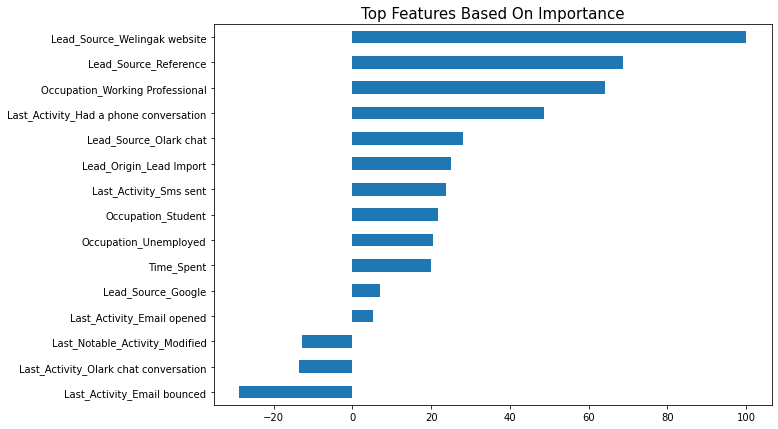

In [137]:
# Displaying the most important factors using the relative coefficient
main_features = res.params[1:]

# Converting the features relative to the maximum percentage feature, for easier analysis
main_features = main_features*100/main_features.max()
main_features = main_features.sort_values(ascending = False)

# Plotting the bar graph based on the importance of the feature
plt.figure(figsize=(10,7))
ax = main_features.plot.barh(align='center')
ax.invert_yaxis()
plt.title('Top Features Based On Importance', fontsize = 15)

##### Creating the final dataframe with Lead Score as another column. We will sort the data based on lead score for simplification.

In [138]:
# Using the lead score to analze the customers on train data
final_train_lead_data = train_lead_data.reset_index()
y_train_pred_final['Lead Number'] = y_train_lead_data.index
final_train_lead_data = final_train_lead_data.merge(y_train_pred_final[['Lead_Score','Lead Number','Predicted']],on='Lead Number')
final_train_lead_data = final_train_lead_data.sort_values('Lead_Score', ascending=False)
final_train_lead_data.head()

,Lead Number,Converted,TotalVisits,Time_Spent,Page_Views,Has_Copy,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark chat,Lead_Source_Organic search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral sites,Lead_Source_Welingak website,Last_Activity_Email bounced,Last_Activity_Email link clicked,Last_Activity_Email opened,Last_Activity_Form submitted on website,Last_Activity_Had a phone conversation,Last_Activity_Olark chat conversation,Last_Activity_Others,Last_Activity_Page visited on website,Last_Activity_Sms sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Email link clicked,Last_Notable_Activity_Email opened,Last_Notable_Activity_Had a phone conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark chat conversation,Last_Notable_Activity_Others,Last_Notable_Activity_Page visited on website,Last_Notable_Activity_Sms sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Lead_Score,Predicted
4495,630427,1,0.0,0,0.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,100,1
4719,605310,1,0.0,0,0.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,100,1
5971,651812,1,10.0,1570,5.33,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,100,1
2524,606316,1,0.0,0,0.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,100,1
2044,634027,1,0.0,0,0.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,100,1


In [139]:
# Using the lead score to analze the customers on test data
final_test_lead_data = test_lead_data.reset_index()
y_test_pred_final['Lead Number'] = y_test_lead_data.index
final_test_lead_data = final_test_lead_data.merge(y_test_pred_final[['Lead_Score','Lead Number','Predicted']],on='Lead Number')
final_test_lead_data = final_test_lead_data.sort_values('Lead_Score', ascending=False)
final_test_lead_data.head()

,Lead Number,Converted,TotalVisits,Time_Spent,Page_Views,Has_Copy,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark chat,Lead_Source_Organic search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral sites,Lead_Source_Welingak website,Last_Activity_Email bounced,Last_Activity_Email link clicked,Last_Activity_Email opened,Last_Activity_Form submitted on website,Last_Activity_Had a phone conversation,Last_Activity_Olark chat conversation,Last_Activity_Others,Last_Activity_Page visited on website,Last_Activity_Sms sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Email link clicked,Last_Notable_Activity_Email opened,Last_Notable_Activity_Had a phone conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark chat conversation,Last_Notable_Activity_Others,Last_Notable_Activity_Page visited on website,Last_Notable_Activity_Sms sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Lead_Score,Predicted
1232,634068,1,0.0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,100,1
619,597829,1,2.0,1876,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,100,1
939,588025,1,0.0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,100,1
1786,640191,1,3.0,1441,3.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,100,1
868,635776,1,2.0,1723,1.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,100,1


In [140]:
# Displaying the summary of the model once again
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.2
Date:                Mon, 08 Feb 2021   Deviance:                       5160.3
Time:                        22:15:24   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Inferences and Recommendations:

- Major indicators that a lead will get converted to a hot lead:
    - Lead_Source_Welingak website - A lead sourced from Welingak Website is more likely to get converted
    - Lead_Source_Reference - A lead who referenced by another hot lead is more likely to get converted
    - Occupation_Working Professional - Working professionals are more likely to get converted.
    - Last_Activity_Had a phone conversation - A lead having phone calls previously are more likely to get converted.
- Major indicators that a lead will NOT get converted to a hot lead:
    - Last_Activity_Email bounced - Customer who bounced their email are not likely to get converted into hot leads.
    - Last_Activity_Olark chat conversation - Customer who had olark chat conversion, are less likely to get converted into hot leads.
    - Last_Notable_Activity_Modified - The customers who have modified something are also not likely to get converted into Hot leads.
- Recommendations:
    - The company should use a leads score threshold of 38 to identify "Hot Leads" as at this threshold, Sensitivity Score of the model is around ~81% which is as good as CEO's target of 80%.